# SAT & GPA Score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S32_L186/1.01. Simple linear regression.csv')

In [3]:
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


**Insight:**  
- There are 84 students who have studied in college
- SAT Score = Critical reading + Mathematics + Writing
- GPA = Grade Point Average (at graduation from university)

## Simple Linear Regression
Create Linear Regression which **predicts GPA based on the SAT score obtained**

Why we need to predict GPA with SAT :
- The SAT is considered one of the best estimators of intellectual capacity & capability
- Almost all colleges accross the USA are using SAT as a proxy for admission
- The SAT stood the test of time

Y= β0 + β1X + ϵ  

where:
- Y is the dependent variable (response),
- X is the independent variable (predictor),
- β0 is the y-intercept (the value of Y when X=0),
- β1 is the slope of the line (the change in Y for a one-unit change in X),
- ϵ represents the error term, accounting for the difference between the observed and predicted values.  

The goal is to estimate the values of β0 and β1 that minimize the sum of squared errors (residuals) between the observed and predicted values. This is typically done using a method called the least squares approach.  
 
 **Linear Regression Assumption :**
 - Linearity
 - No endogeneity
 - Normality & Homoscedasticity
 - No autocorrelation
 - No multicollinearity

In [5]:
#Define dependent & independent variable
#dependent variable y= GPA
#independent variable x1= SAT
y = data['GPA']
x1 = data['SAT']

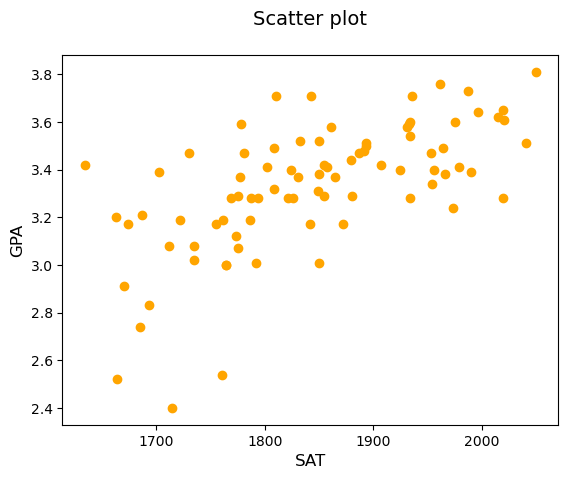

In [6]:
#scatter plot
plt.scatter(x1,y, color='orange')

#label axes
plt.xlabel('SAT',fontsize=12)
plt.ylabel('GPA',fontsize=12)

#title
plt.title('Scatter plot\n', fontsize=14)

plt.show()

**Insight:**  
- There is strong relationship between SAT and GPA
- The higher the SAT of a student, the higher their GPA

**Constant**  
In the context of linear regression modeling, adding a constant term is important because it represents the y-intercept of the regression linear.    

Y= β0 + β1X + ϵ   

sm.add_constant() adds a column of ones to the input variable X (or a set of variables)  
This essentially extends the equation to :  
Y= β0.constant + β1X + ϵ   
Y= β0.1 + β1X + ϵ   
  
it helps in estimating both the intercept (β0) and the slope (β1) when using Statsmodels for regression analysis  
This is important because it ensures that the regression model considers a non-zero intercept  
  
 **OLS**  
 - OLS is a method used to estimate the parameters (coefficients) of a linear regression model
 - The goal of fitting a model with OLS is to find the values of the model parameters that minimize the sum of the squared differences between the observed values and the values predicted by the model.

In [7]:
#add a constant. We're adding new column (equal in length of x), which consist only 1s
x = sm.add_constant(x1)

#fit the model, according to OLS (Ordinary Least Square) method with dependet variable y & independent variable x
results = sm.OLS(y,x).fit()

#print summary of regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.20e-11
Time:                        13:31:23   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Insight:**  
Y= β0 + β1X + ϵ  
β0 = const = 0.2750  
β1 = coef SAT = 0.0017  

Y= 0.2750 + 0.0017x1  
GPA= 0.2750 + 0.0017 SAT  
  
 p-value < 0.05, means that variable is significant.  
 From the table, we've got P>|t| 0.000. It means that SAT is significant variable when predicting college GPA 
   
 F-statistic is used for testing the overall significance of the model  
 F-Test :  
 H0 : β1 = β2 = ... = βk = 0  
 H1 : at least one β != 0  
   
 If all β are 0, then none of the x's matter ==> our model has no merit  
 Prob (F-statistic):7.20e-11 is really low < 0.05 ==> our model is significant

Text(0.5, 1.0, 'Scatter plot with Best Fitting Line\n')

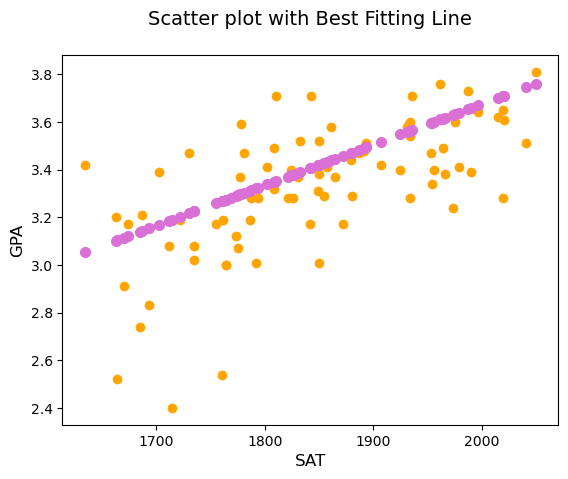

In [8]:
#scatter plot  
plt.scatter(x1,y, color='orange')

#define regression equation
yhat = 0.2750 + 0.0017*x1

#plot regression line against SAT
fig = plt.scatter(x1, yhat, lw=2, c='orchid', label='regression line')

#label the axes
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

#title
plt.title('Scatter plot with Best Fitting Line\n', fontsize=14)

- That is the best fitting line, or the line which is closest to all observation simultaneously  
GPA= 0.2750 + 0.0017 SAT  
GPA = 0.275 + 0.017(1700)  
GPA = 3.165  
The expected GPA for this student according to our model is 3.165

## Multiple Linear Regression  
Multiple linear regression is an extension of simple linear regression that involves modeling the relationship between a dependent variable and two or more independent variables.   

Y=β0 + β1X1 + β2X2 + ...+ βpXp  + ϵ  
  
The goal in multiple linear regression is to estimate the coefficients (β)

In [9]:
data_2 = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S33_L194/1.02. Multiple linear regression.csv')

In [10]:
data_2.head(2)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3


In [11]:
#dependent variable
y = data_2['GPA']

#independent variable
x1 = data_2[['SAT', 'Rand 1,2,3']]

In [12]:
#add a constant. We're adding new column (equal in length of x), which consist only 1s
x = sm.add_constant(x1)

#fit the model, according to OLS (Ordinary Least Square) method with dependet variable y & independent variable x
results = sm.OLS(y,x).fit()

#print summary of regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           6.58e-10
Time:                        13:31:23   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

When we combine variable x to some random variable, it decrease its F-Statistic, the model still significant but less.

## Dummy Variables (Deal with categorical predictors)
dummy --> imitation of categories with number

In [13]:
raw_data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S33_L203/1.03. Dummies.csv')

In [14]:
raw_data.head(2)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No


Attendance reflects if a student attended more than 75% of the lectures

In [15]:
#map all 'No' entries with 0, and 'Yes' with 1
data = raw_data.copy()

data['Attendance'] = data['Attendance'].map({'Yes':1, 'No':0})

data.head(2)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0


In [16]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


- Average of students attendance more than 75% of lectures is only 46.42% have attended
- Mean < 0.5 shows that there are more 0s than 1s

### Multiple Linear Regression

In [17]:
y = data['GPA']
x1 = data[['SAT','Attendance']] 

In [18]:
#Add a constant
x = sm.add_constant(x1)

#fit the model
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           2.19e-15
Time:                        13:31:23   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Prob (F-statistic): 2.19e-15 < 0.05 ==> overall model is significant
- P>|t|:0.000  ==> SAT score & Attendance is significant
- Adj. R-squared : 0.555 which is greater rathen than what we've got without attendance
- GPA= 0.6439 + 0.0014 SAT + 0.2226 Dummy
- GPA_absent= 0.6439 + 0.0014 SAT + 0.2226(0) ==> GPA_absent= 0.6439 + 0.0014 SAT
- GPA_present= 0.6439 + 0.0014 SAT + 0.2226(1) ==> GPA_present= 0.8665 + 0.0014 SAT
- We have 2 equations that have the same slope but different intercept

Text(0.5, 1.0, 'Scatter plot SAT with GPA based on Attendance\n')

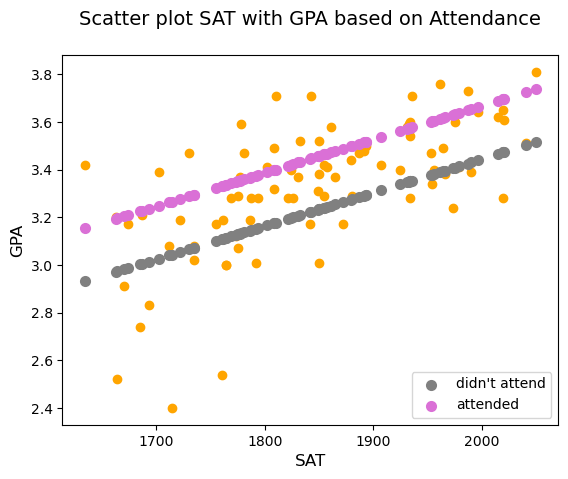

In [19]:
#Plot the regression line(s) on the scatter plot
plt.scatter(data['SAT'], y, color='orange')

#define 2 regression equation
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

#plot 2 regression line
fig = plt.scatter(data['SAT'], yhat_no, lw=2, c='grey', label="didn't attend")
fig = plt.scatter(data['SAT'], yhat_yes, lw=2, c='orchid', label="attended")

#label the axes
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

#legend
plt.legend(loc='lower right')

#title
plt.title('Scatter plot SAT with GPA based on Attendance\n', fontsize=14)

On average the GPA of those who attendeded is 0.2226(dummy coef) higher

In [20]:
data.head(2)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0


Text(0.5, 1.0, 'Scatter plot SAT with GPA based on Attendance\n')

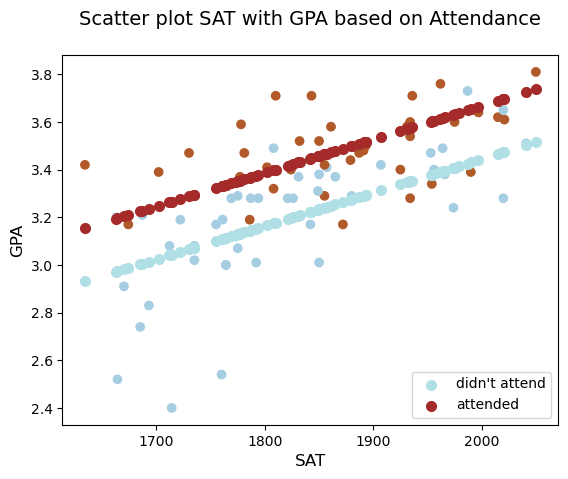

In [21]:
#Plot the regression line(s) on the scatter plot and color the data points
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='Paired')

#define 2 regression equation
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']

#plot 2 regression line
fig = plt.scatter(data['SAT'], yhat_no, lw=2,c='powderblue', label="didn't attend")
fig = plt.scatter(data['SAT'], yhat_yes, lw=2, c='brown', label="attended")

#label the axes
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

#legend
plt.legend(loc='lower right')

#title
plt.title('Scatter plot SAT with GPA based on Attendance\n', fontsize=14)

- GPA_attended= 0.8665 + 0.0014 SAT
- GPA_didn't attend= 0.6439 + 0.0014 SAT

Text(0.5, 1.0, 'Scatter plot SAT with GPA based on Attendance\n')

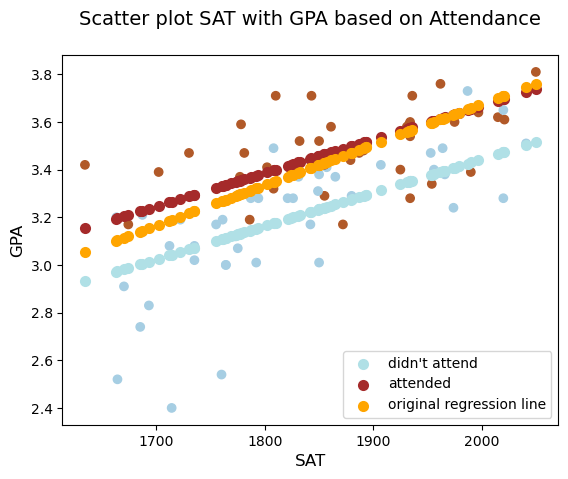

In [22]:
#Plot the regression line(s) on the scatter plot and color the data points
plt.scatter(data['SAT'], data['GPA'], c=data['Attendance'], cmap='Paired')

#define 2 regression equation
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
#Add the original regression line
yhat = 0.2750 + 0.0017*data['SAT']

#plot 2 regression line
fig = plt.scatter(data['SAT'], yhat_no, lw=2,c='powderblue', label="didn't attend")
fig = plt.scatter(data['SAT'], yhat_yes, lw=2, c='brown', label="attended")
# Plot the original regression line
fig = plt.scatter(data['SAT'], yhat, lw=2, c='orange', label="original regression line")

#label the axes
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

#legend
plt.legend(loc='lower right')

#title
plt.title('Scatter plot SAT with GPA based on Attendance\n', fontsize=14)

- GPA_attended= 0.8665 + 0.0014 SAT
- GPA_didn't attend= 0.6439 + 0.0014 SAT
- GPA original = 0.2750 + 0.0017 SAT

## Making Predictions based on Regression
Create prediction of 2 students :
- Budi, who got 1700 on SAT and did not attend >75% of lecturers
- Ani, who got 1670 on SAT and attended >75% of lecturers

In [23]:
#display independent variable
#const 1.0 comes from 'add_constant' method
#Y= β0.constant + β1X + ϵ   
#Y= β0.1 + β1X + ϵ 
x.head()

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0


In [24]:
#create prediction dataframe
new_data = pd.DataFrame({'const': 1,
                        'SAT':[1700, 1670],
                        'Attendance':[0,1]})
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [25]:
#rename index with name
new_data.rename(index={0:'Budi',
                      1:'Ani'})

,const,SAT,Attendance
Budi,1,1700,0
Ani,1,1670,1


In [26]:
#use predict method on regression 
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [27]:
#create new df for predictions
predictionsdf = pd.DataFrame({'Predictions':predictions})

#join 2 df
joined = new_data.join(predictionsdf)

#rename index with name
joined.rename(index={0:'Budi',
                      1:'Ani'})

,const,SAT,Attendance,Predictions
Budi,1,1700,0,3.023513
Ani,1,1670,1,3.204163


- The predicted GPA at graduation for Budi is 3.02
- The predicted GPA at graduation for Ani is 3.20
- Ani scored lower on SAT, but she attended > 75% of lectures, and she is predicted to graduate with a significantly higher GPA than Budi

## Linear Regression with sklearn

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
data3 = data[['SAT','GPA']]
data3.head(2)

,SAT,GPA
0,1714,2.40
1,1664,2.52


In [30]:
#independent variable/input/feature
x = data3['SAT']

#dependent variable/output/target
y = data3['GPA']

In [31]:
#check shapes of features
x.shape

(84,)

In [32]:
y.shape

(84,)

In [33]:
#when fit the model, we'll have to convert data frames into ndarrays
#in order to feed variable x to sklearn, it should be 2D array (matrix)
#so, we must to reshape it
#it will not be needed  when we've got more than 1 feature (as the inputs will be a 2D array by default)
x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(84, 1)

In [34]:
#create linear regression
reg = LinearRegression()

In [35]:
#fitting the regression
#reg.fit(x, y)
#reg.fit(input, target)
#argument is x,y (unlike with statsmodels)
reg.fit(x_matrix, y)

LinearRegression()

### R-squared, Coefficient, Intercept

In [36]:
#get r-squared
reg.score(x_matrix, y)

0.40600391479679765

In [37]:
#get coefficient
#teh output is an array, as we expect several coefficient
reg.coef_

array([0.00165569])

In [38]:
#get intercept
reg.intercept_

0.2750402996602803

### Compare sklearn with statsmodels summary

In [39]:
#add a constant. We're adding new column (equal in length of x), which consist only 1s
x = sm.add_constant(x)

#fit the model, according to OLS (Ordinary Least Square) method with dependet variable y & independent variable x
results = sm.OLS(y,x).fit()

#print summary of regression
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           7.20e-11
Time:                        13:31:25   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Insight:**
- R-squared, coefficient, and intercept are similar using sklearn or statsmodels summary

### Predictions
Create prediction of GPA for SAT score 1740 and 1760

In [40]:
#predict method expect 2D-array, so we create new df
new_data = pd.DataFrame(data=[1740, 1760], columns=['SAT'])
new_data

,SAT
0,1740
1,1760


In [41]:
#predict whole data in bulk
reg.predict(new_data)

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([3.15593751, 3.18905127])

In [42]:
#store prediction into dataframe
new_data['Predicted_GPA'] = reg.predict(new_data)
new_data

C:\Users\nurahman\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


,SAT,Predicted_GPA
0,1740,3.155938
1,1760,3.189051


- The predicted GPA for SAT score 1740 = 3.155938
- The predicted GPA for SAT score 1760 = 3.189051
- The higher SAT score, the higher GPA score

In [43]:
x.shape

(84, 2)

In [44]:
y.shape

(84,)

In [45]:
y = data['GPA']
x = data['SAT']

Text(0.5, 1.0, 'Scatter plot with Best Fitting Line\n')

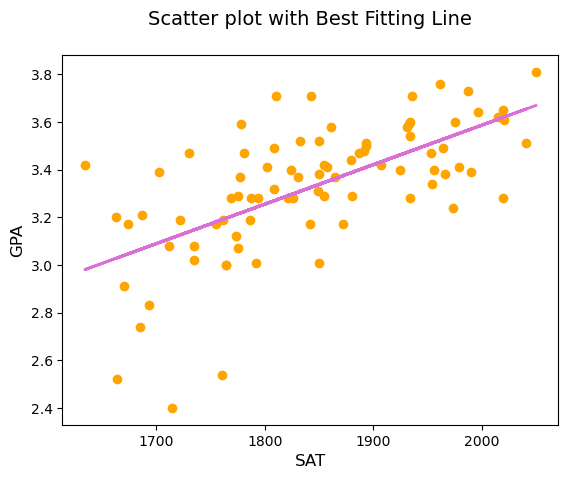

In [46]:
#Scatter plot dataset SAT and GPA
plt.scatter(x, y, color='orange')

#parametrized version of regression line
#Y= β1X + β0 + ϵ
y_hat = (reg.coef_ * x_matrix) + reg.intercept_

#plot regression line
fig = plt.plot(x, y_hat, lw=2, c='orchid', label='regression line')

#label the axes
plt.xlabel('SAT', fontsize=12)
plt.ylabel('GPA', fontsize=12)

#title
plt.title('Scatter plot with Best Fitting Line\n', fontsize=14)

## Multiple Linear Regression with sklearn

In [47]:
data_2.head(2)

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3


In [48]:
#independent variables : SAT; Rand 1,2,3
x = data_2[['SAT','Rand 1,2,3']]

#dependent variable : GPA
y = data_2['GPA']

In [49]:
x.shape

(84, 2)

In [50]:
y.shape

(84,)

In [51]:
#regression
reg = LinearRegression()

#fitting regression
#we do not need to reshape input
#sklearn is optimized for multiple linear regression
reg.fit(x,y)

LinearRegression()

In [52]:
#coefficient of regression
reg.coef_

array([ 0.00165354, -0.00826982])

- coefficient of SAT = 0.00165354
- coefficient of Rand 1,2,3 = -0.00826982

In [53]:
#intercept
reg.intercept_

0.29603261264909486

### Calculating the R-squared
- the R-squared is universal measure to evaluate how well linear regression fare and compare

In [54]:
#R-squared
reg.score(x,y)

0.40668119528142843

#### Formula for Adjusted R^2

$R^2_{adj.} = 1 - (1-R^2)*\frac{n-1}{n-p-1}$
- The Adjusted R-squared steps on the R-squared and adjust the number of variables included in the model
- to find the Adjusted R-squared, we need R-squared, the num of observations, the num of features

In [55]:
x.head(2)

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3


In [56]:
#shape of x
x.shape

(84, 2)

In [57]:
#R-squared
r2 = reg.score(x,y)

#num of observations
n = x.shape[0]

#num of features(predictors)
p = x.shape[1]

#Adjusted R-squared
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.39203134825134023

- In multiple linear regression, both the R-squared and the adjusted R-squared are measures of how well the independent variables explain the variability in the dependent variable.
- The adjusted R-squared is a modified version of the R-squared that accounts for the number of predictors in the model.
- If the adjusted R-squared is less than the R-squared, it implies that the inclusion of additional predictors in the model (beyond the simple R-squared) is not contributing significantly to the explanation of the variability in the dependent variable
- Adj.R-squared(0.392) < R-squared(0.406) ==> one or more of the predictors have little or no explanatory power  
  
  **How to detect the variables which are unneeded in a model??** ==> feature selection

## Feature Selection
- Feature Selection simplifies models, improve speed & prevents a series of unwanted issues arising from having too many features
- If p-value > 0.05 ==> disregard variable

In [58]:
#f_regression module allows us to select the most appopriate features for our regression
from sklearn.feature_selection import f_regression

In [59]:
#f_regression finds the F-statistics (ANOVA) for the *simple* regressions on GPA where SAT & Rand(1,2,3) is the independent variables
#The limitation of this approach is that it does not take into account the mutual effect of the two features
f_regression(x,y)

(array([56.04804786,  0.17558437]), array([7.19951844e-11, 6.76291372e-01]))

There are two output arrays :
- The first one contains the F-statistics for each of the regressions
- The second one contains the p-values of these F-statistics

In [60]:
#p-values & round to 3 digit
p_values = f_regression(x,y)[1].round(5)
p_values

array([0.     , 0.67629])

- p-values of SAT = 0.0000 < 0.05 ==> useful variable
- p-values of Rand(1,2,3) = 0.67629 > 0.05 ==> useless variable
- These are the univariate p=values reached from simple linear models. They don't reflect the interconnection of the features in our multiple linear regressions.

### Summary Table

In [61]:
x.columns

Index(['SAT', 'Rand 1,2,3'], dtype='object')

In [62]:
#new data frame with the names of the features
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary

,Features
0,SAT
1,"Rand 1,2,3"


In [63]:
#add coefficient
reg_summary['Coefficient'] = reg.coef_

#add p-values
reg_summary['p-value'] = p_values

In [64]:
reg_summary

,Features,Coefficient,p-value
0,SAT,0.001654,0.00000
1,"Rand 1,2,3",-0.008270,0.67629


- p-values are one of the best ways to determine if a variable is redundant
- But they provide no information about how useful a variable is
- It seems like Rand 1,2,3 has bigger coefficient, hence a greater impact, and this conclusion could be wrong
- SAT ranging between 600 and 2400, while Rand 1,2,3 between 1 and 3
- Since SAT has much greater magnitude, it is much more important !!

## Feature selection through Standardization
- the common problem with numerical data is difference in magnitudes
- Solution : Standardization (Feature Scalling) ==> the process of transforming data into standard scale 
- Having all inputs with the same magnitude allows us to compare  their impact
  
  **z= (x−μ)/σ**
- z = standardized value
- x = original value
- μ = mean of the feature
- σ = standard deviation

In [65]:
x.head(2)

,SAT,"Rand 1,2,3"
0,1714,1
1,1664,3


In [66]:
y.head(2)

0    2.40
1    2.52
Name: GPA, dtype: float64

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
#empty StandardScaler object
#scaler will be used to substract the mean & divide by standard deviation 
#z= (x−μ)/σ
scaler = StandardScaler()

In [69]:
#fit calculates & store the mean & standard deviation of each feature
#still unscalled inputs
scaler.fit(x)

StandardScaler()

In [70]:
#transform unscalled inputs
x_scaled = scaler.transform(x)

In [71]:
#all input data alrealdy standardized
x_scaled[:5]

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087]])

## Regression with Scaled Features

In [72]:
reg = LinearRegression()
reg.fit(x_scaled, y)

LinearRegression()

In [73]:
reg.coef_

array([ 0.17181389, -0.00703007])

In [74]:
reg.intercept_

3.330238095238095

### Summary Table

In [75]:
#In 'Machine Learning context' for intercept is bias
reg_summary = pd.DataFrame([['Bias'],['SAT'],['Rand 1,2,3']], columns=['Features'])

In [76]:
#Weights is 'Machine Learning word' for coefficient
reg_summary['Weights'] = reg.intercept_, reg.coef_[0], reg.coef_[1]

In [77]:
reg_summary

,Features,Weights
0,Bias,3.330238
1,SAT,0.171814
2,"Rand 1,2,3",-0.007030


- When calculate coefficient of regression before without standardization, we couldn't immediately see the effect of each variable on the output.
- The reason is SAT ranging between 600 and 2400, while Rand 1,2,3 between 1 and 3
- The close a weight is to 0, the smaller its impact 
- The bigger the weights, the bigger the impact of the feature on regression
- Weights of SAT much more bigger than Rand 1,2,3
- Rand 1,2,3 barely contributes to output
- In general prefer to leave out the worst performing features

## Making predictions with standardized coefficient (weight)
Create GPA prediction for SAT score 1700 and 1800

In [78]:
#for simplicity, create new df with 2 new observaations
new_data = pd.DataFrame(data=[[1700,2],[1800,1]],
                       columns = ['SAT','Rand 1,2,3'])
new_data

,SAT,"Rand 1,2,3"
0,1700,2
1,1800,1


In [79]:
#the model is expecting scaled features
#transform new data using scaler
new_data_scaled = scaler.transform(new_data)

new_data_scaled

array([[-1.39811928, -0.07002087],
       [-0.43571643, -1.24637147]])

In [80]:
#create prediction using scaled new data
reg.predict(new_data_scaled)

array([3.09051403, 3.26413803])

- SAT score 1700 ==> expected GPA = 3.0905
- SAT score 1800 ==> expected GPA = 3.2641

### What If we removed 'Random 1,2,3' variable
- Features with very small weight could be removed
- Create GPA prediction for SAT score 1700 and 1800

In [82]:
#call data that alrealdy standardized
x_scaled[:5]

array([[-1.26338288, -1.24637147],
       [-1.74458431,  1.10632974],
       [-0.82067757,  1.10632974],
       [-1.54247971,  1.10632974],
       [-1.46548748, -0.07002087]])

In [83]:
#pick only standardized SAT score, we don;t need rand 1,2,3
x_scaled[:,0]

array([-1.26338288, -1.74458431, -0.82067757, -1.54247971, -1.46548748,
       -1.68684014, -0.78218146, -0.78218146, -0.51270866,  0.04548499,
       -1.06127829, -0.67631715, -1.06127829, -1.28263094, -0.6955652 ,
        0.25721362, -0.86879772, -1.64834403, -0.03150724, -0.57045283,
       -0.81105355, -1.18639066, -1.75420834, -1.52323165,  1.23886453,
       -0.18549169, -0.5608288 , -0.23361183,  1.68156984, -0.4934606 ,
       -0.73406132,  0.85390339, -0.67631715,  0.09360513,  0.33420585,
        0.03586096, -0.35872421,  1.04638396, -0.65706909, -0.13737155,
        0.18984542,  0.04548499,  1.1618723 , -1.37887123,  1.39284898,
        0.76728713, -0.20473975,  1.06563201,  0.11285319,  1.28698467,
       -0.41646838,  0.09360513,  0.59405462, -2.03330517,  0.32458182,
        0.40157405, -1.10939843,  1.03675993, -0.61857297,  0.44007016,
        1.14262424, -0.35872421,  0.45931822,  1.88367444,  0.45931822,
       -0.12774752,  0.04548499,  0.85390339,  0.15134931,  0.82

In [84]:
#create simple linear regression(simple, because there is single feature)
reg_simple = LinearRegression()

#reshape the inputs into matrix
#pick only standardized SAT score
x_simple_matrix = x_scaled[:,0].reshape(-1,1)

#fit regression
reg_simple.fit(x_simple_matrix, y)

LinearRegression()

In [87]:
#predict SAT score of the new_data_scaled
#reshape it
reg_simple.predict(new_data_scaled[:,0].reshape(-1,1))

array([3.08970998, 3.25527879])

With Rand(1,2,3) :
- SAT score 1700 ==> expected GPA = 3.09
- SAT score 1800 ==> expected GPA = 3.26

Without Rand(1,2,3) :
- SAT score 1700 ==> expected GPA = 3.09
- SAT score 1800 ==> expected GPA = 3.26

the result is same if we rounded it to 2 decimals

## Train Test Split
- train our model on the training dataset
- then test it on the testing dataset

In [90]:
from sklearn.model_selection import train_test_split

In [98]:
#create new df range 0-100
a = np.arange(1,101)

In [99]:
a

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [93]:
#create new df range 501-600
b = np.arange(501,601)

In [94]:
b

array([501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513,
       514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526,
       527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539,
       540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552,
       553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565,
       566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 576, 577, 578,
       579, 580, 581, 582, 583, 584, 585, 586, 587, 588, 589, 590, 591,
       592, 593, 594, 595, 596, 597, 598, 599, 600])

In [100]:
train_test_split(a)

[array([ 99,  63,  41,   1,  36,  53,  14,  42,  17,  80,  65,  34,  46,
         24,  30,  75,  74,   9,  62,  15,   3,   5,  83,  12,  87,  64,
         47,  89,  11,  23,  21,  25,  84,  43,  98,  40,  29,  35,   7,
         82,  85,  68,  77,  88,  10,   6,  19,  18,  90,  28,  33,  73,
         20,  70,  52,  60,  50, 100,  16,  92,  81,  94,  97,  48,  27,
         67,  45,  78,  72,  39,   4,  44,  51,  86,  69]),
 array([93, 38, 57, 76, 79,  8, 95, 71, 91, 26, 61,  2, 66, 59, 13, 54, 58,
        96, 55, 49, 22, 37, 32, 56, 31])]

- There are 2 arrays : a_train, a_test
- both arrays are shuffled !!
- every time we run train_test_split(a), it WILL ALWAYS get random shuffled
- different shuffle every time would prevent objective assessment
- We would like to shuffle data, but shuffled in the same way every time 
- **Solution:** random_state, 42 is conventionally used

In [101]:
#split data
#we have input and target, so we have to split 2 different arrays
#common split are 75-25, 80-20, 85-15, 90-10
#always employ 'random_state' to ensure when splitting data, we've got same random shuffle
#2 input (a & b) will be split into 4 arrays
#the order is train1, test1, train2, test2
#store the in 4 variable
#when we split 'a' & 'b' using train_test_split, their elements are shuffled in the same way
#this is IMPORTANT for regressions, because we want certain observation input to match with target even after shuffling
a_train, a_test, b_train, b_test = train_test_split(a, b ,test_size= 0.2, random_state= 365)

In [102]:
#check the shape
a_train.shape, a_test.shape

((80,), (20,))

In [103]:
#check the shape
b_train.shape, b_test.shape

((80,), (20,))

## Logistic Regression
**Predicting whether student will be admitted or not**
- Logistic regression predicts the probability of an event occuring
- Logistic regression implies that possible outcomes are not numerical, but categorical
- Decision making often boils down to 'yes' or 'no' situation  
  
 **Logistic Regression Assumption :**
 - Non - Linear
 - No endogeneity
 - Normality & Homoscedasticity
 - No autocorrelation
 - No multicollinearity

In [25]:
from IPython.display import Image

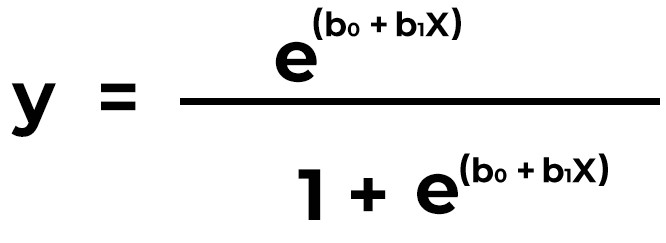

In [30]:
#function of logistic regression
Image(filename='image/logistic_function.jpg', width=300, height=10)

In [2]:
raw_data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L235/2.01. Admittance.csv')

In [3]:
raw_data.head(2)

,SAT,Admitted
0,1363,No
1,1792,Yes


In [5]:
#copy data
data = raw_data.copy()

#replace 'Yes' to 1, 'No' to 0
data['Admitted'] = data['Admitted'].map({'Yes':1,
                            'No':0})

In [6]:
data.head(2)

,SAT,Admitted
0,1363,0
1,1792,1


In [8]:
#dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

<function matplotlib.pyplot.show(close=None, block=None)>

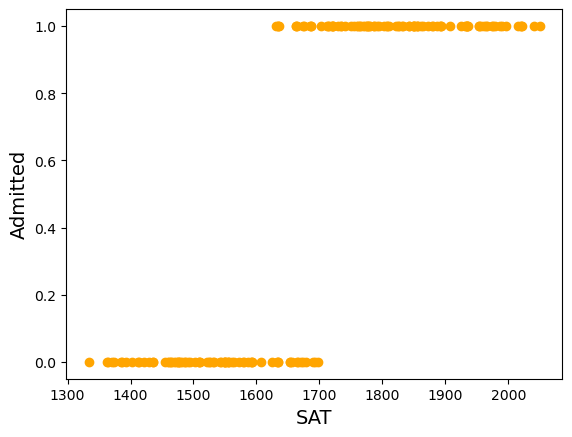

In [9]:
#scatter plot
plt.scatter(x1, y, color='orange')

#label
plt.xlabel('SAT', fontsize=14)
plt.ylabel('Admitted', fontsize=14)

plt.show

- The outcome 0 = students didn't get admitted
- The outcome 1 = students get admitted

### If we plot regression line on logistic regression
The data is not linear, so the linear regression doesn't make much sense

In [11]:
#coefficient
x = sm.add_constant(x1)

#OLS
reg_lin = sm.OLS(y, x)

#fitted regression (results)
results_lin = reg_lin.fit()

In [12]:
#see intercept & slope
results_lin.params

const   -3.251859
SAT      0.002248
dtype: float64

- Y= β0 + β1X + ϵ 
- β0 = -3.251859
- β1 = 0.002248

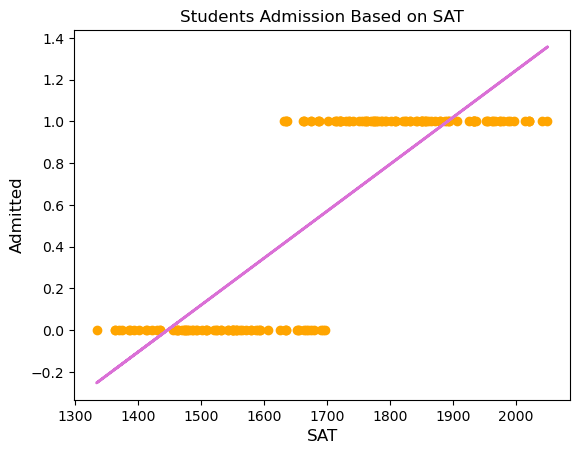

In [13]:
#scatter plot
plt.scatter(x1, y, color='orange')

#regression line
y_hat = results_lin.params[0] + (results_lin.params[1]*x1)
plt.plot(x1, y_hat, c='orchid', lw=2)

#label
plt.xlabel('SAT', fontsize=12)
plt.ylabel('Admitted', fontsize=12)

#title
plt.title('Students Admission Based on SAT')

plt.show()

- linear regression is an awful fit and predict values fall outside the natural domain of admission
- The regression doesn't even know that our values are bounded between 0 and 1
- OLS assumption was linearity, and our data is non-linear, so we must use non-linear approaches

### Plot logistic regression curve

In [14]:
#coefficient
reg_log = sm.Logit(y,x)

#fitted logistic (results)
results_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [17]:
results_log.params

const   -69.912802
SAT       0.042005
dtype: float64

- β0 = -69.912802
- β1 = 0.042005

In [15]:
#function of logistic line
def f(x, b0, b1):
    return np.array(np.exp(b0 + x*b1) / (1 + np.exp(b0 + x*b1)))

In [18]:
f_sorted = np.sort(f(x1, results_log.params[0], results_log.params[1]))

In [21]:
x_sorted = np.sort(np.array(x1))

In [22]:
#check x_sorted
x_sorted[:5]

array([1334, 1363, 1364, 1370, 1374], dtype=int64)

In [23]:
#check f_sorted
f_sorted[:5]

array([9.39130917e-07, 3.17509804e-06, 3.31130788e-06, 4.26043595e-06,
       5.03991985e-06])

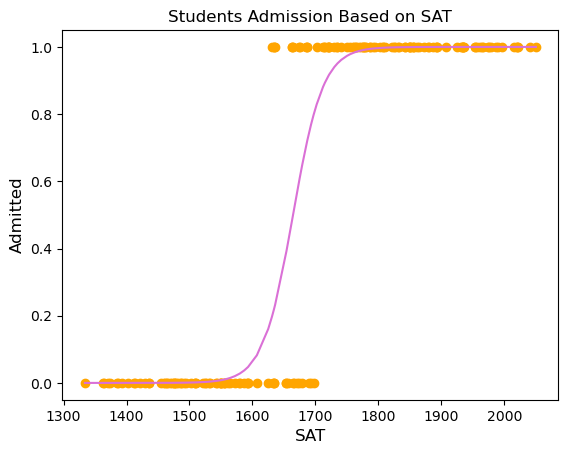

In [24]:
#scatter plot
plt.scatter(x1, y, c='orange')

#plot logistic regression curve
plt.plot(x_sorted, f_sorted, c='orchid')

#label
plt.xlabel('SAT', fontsize=12)
plt.ylabel('Admitted', fontsize=12)

#title
plt.title('Students Admission Based on SAT')

plt.show()

- This function shows the probability of admission given an SAT score
- When SAT score is relatively low, the probability of getting admitted is 0%
- When SAT score is relatively high, the probability of getting admitted is 100%
- Score between 1,600 and 1,750 is uncertain
- SAT score 1,650, the students roughly 50% chance of getting in
- SAT score 1,700, the students got 80% chance of getting in

In [31]:
#summary
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.7992
Time:                        19:07:47   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

**Method: MLE (Maximum Likelihood Estimation)**
- Likelihood function : a function which estimates how likely it is that the model at hand describes the real underlying relationship of the variables
- The bigger the Likelihood function, the higher the probability that our model is correct
- MLE tries to maximize the likelihood function
- The computer is going through different values, until it finds model, for which the likelihood is the highest
- When it can no longer improve it, it will just stop the optimization  
  
**Log-Likelihood: -23.145**
- Log-Likelihood is popular metric
- The value of Log-Likelihood is almost but not always negative
- The bigger Log-Likelihood, the better  
  
 **LL-Null:	-115.26**
 - LL-Null = Log-Likelihood Null
 - The log-likelihood of a model which has no independent variables  
 
    
 **LLR p-value:	5.805e-42** 
 - LLR (Log Likelihood Ratio) have p-value and that's what we need
 - p-value is very low ==> our model is significant  
   
 **Pseudo R-squ.: 0.7992**
 - Pseudo R-squ is McFadden's R-Squared
 - Good Pseudo R-squared between 0.2 and 0.4
 - This measure is mostly useful for comparing variations of the same model
 - Different models will completely different & incomparable Pseudo R-squared   
  
 **Logit Model**
 - Logit model of SAT-Admission regression = log(phi / (1-phi)) = -69.91 + 0.0420 SAT
 - phi = probability of an event occuring
 - 1-phi = probability of an event NOT occuring
 - log(odds2 / odds1) = 0.0420(SAT2 - SAT1)
 - Difference of 1 unit SAT ==> odds2 = 104.2% odds1
 - When SAT score increases by 1, the odds of admittance increases by 4.2%

## Binary Predictors
- odds represent the ratio of the probability of an event occurring to the probability of it not occurring
- The odds are commonly used to express the likelihood of success in binary events

In [32]:
raw_data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L243/2.02. Binary predictors.csv')

In [33]:
raw_data.head(2)

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female


In [34]:
#copy dataset
data = raw_data.copy()

#convert Yes : 1, No : 0
data['Admitted'] = raw_data['Admitted'].map({'Yes':1, 'No':0})

#convert Female:1, Male:0
data['Gender'] = raw_data['Gender'].map({'Female':1, 'Male':0})

In [35]:
data.head(2)

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1


In [36]:
#declare dependent & independent variables
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [37]:
#coefficient
x = sm.add_constant(x1)

#logistic regression
reg_log = sm.Logit(y,x)

#fit
results_log = reg_log.fit()

#summary
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                  0.8249
Time:                        20:39:48   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

- LLR p-value:	5.118e-42 < 0.05 ==> the model is significant
- P>|z|	Gender: 0.022 < 0.05 ==> Gender is significant

In [38]:
#take the exponential of gender
np.exp(1.9449)

6.992932526814459

- odds of female to get admitted are 6.99 times odds of male
- given the same SAT score, a female has 7 times higher odds to get admitted than the male
- in this particular university (degree), it is much easier for females to enter
- example communications, most of them are female, while STEM predominantly male

## Accuracy

In [39]:
#change the formatting of np arrays
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})

#predict result
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [40]:
#prediction table (confusion matrix)
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [41]:
#create table of confusion matrix
cm_df = pd.DataFrame(results_log.pred_table())

#rename columns
cm_df.columns = ['Predicted 0', 'Predicted 1']

#rename index
cm_df = cm_df.rename(index = {0 : 'Actual 0',
                             1: 'Actual 1'})

In [42]:
#confusion matrix
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


- Confusion matrix shows how confused our model is
- For 69 observations, the model predicted 0 and the True Value was 0
- For 90 observations, the model predicted 1 and the True Value was 1
- These cells indicated how many cases the model did its job well
- But for 4 observations, the model predicted 0 while the outcome was 1
- And for 5 observations, the model predicted 1 while the outcome was 
- In (69 + 90 = 159) cases the model did its job well
- In (5 + 4 = 9) cases the model 'got confused'

In [44]:
#create an array, easier to calculate the accuracy
cm = np.array(cm_df)

In [45]:
cm

array([[69.00, 5.00],
       [4.00, 90.00]])

In [46]:
cm[0,0]

69.0

In [47]:
cm[1,1]

90.0

In [48]:
#calculate accuracy of the model
accuracy_train = (cm[0,0] + cm[1,1]) / cm.sum()
accuracy_train

0.9464285714285714

The accuracy of our model is 94.64%. Our model seems good at classifying

## Testing the model
- Use our model to make predictions based on the test data
- compare those with actual income
- calculate accuracy
- create confusion matrix

In [49]:
test = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_5_Advanced_Statistical_Methods_(Machine_Learning)\S36_L248/2.03. Test dataset.csv')

In [50]:
test.head(2)

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female


In [51]:
#convert Yes : 1, No : 0
test['Admitted'] = test['Admitted'].map({'Yes':1, 'No':0})

#convert Female:1, Male:0
test['Gender'] = test['Gender'].map({'Female':1, 'Male':0})

In [52]:
test.head(2)

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1


In [53]:
#split target and input test data

#get actual values (target)
test_actual = test['Admitted']

#get test data to be predicted
test_data = test.drop(['Admitted'], axis=1)

In [54]:
test_actual.head(2)

0    0
1    1
Name: Admitted, dtype: int64

In [55]:
test_data.head(2)

,SAT,Gender
0,1323,0
1,1725,1


In [56]:
#add 1 constanta
test_data = sm.add_constant(test_data)

In [57]:
test_data.head(2)

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1


In [58]:
#confusion matrix function
def confusion_matrix(data, actual_values, model) :
    #Predict the values using the Logit model
    pred_values = model.predict(data)
    
    #specify the bins
    bins = np.array([0, 0.5, 1])
    
    #create a histogram, where if values are between 0 and 0.5 tell will be considered 0
    #if they are between 0.5 and 1, they will be considered 1
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    
    #accuracy
    accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
    
    return cm, accuracy

In [59]:
#create confusion matrix with the test data
cm = confusion_matrix(test_data, test_actual, results_log)

In [60]:
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [66]:
#accuracy
print(f'accuracy of this model: {(cm[1] * 100).round(2)}%'  )

accuracy of this model: 89.47%


- The test accuracy is the figure we use when we refer to overall accuracy
- Almost always the training accuracy is higher than test accuracy

In [61]:
#create table of confusion matrix
cm_df = pd.DataFrame(cm[0])

#rename columns
cm_df.columns = ['Predicted 0', 'Predicted 1']

#rename index
cm_df = cm_df.rename(index = {0 : 'Actual 0',
                             1: 'Actual 1'})

In [62]:
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [63]:
# Check the missclassification rate
#missclassification rate = missclassified / all elements
# Note that Accuracy + Missclassification rate = 1 = 100%
print ('Missclassification rate: '+str((1+1)/(1+1+5+12)))

Missclassification rate: 0.10526315789473684
